<a href="https://colab.research.google.com/github/jenn2325/Jen-s-personal-project/blob/main/Bank_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Customer Churn Prediction Analysis**

In this project, I will use supervised learning models to identify customers who are likely to churn in the future. Furthermore, I analyze top factors that influence user retention. [Dataset information](https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers).

## Contents

* [Part 0: Setup/Data Collection](#Part-0:-Setup-Googl-Drive-Environment-/-Data-Collection)
* [Part 1: Data Exploration](#Part-1:-Data-Exploration)
* [Part 2: Feature Preprocessing](#Part-2:-Feature-Preprocessing)
* [Part 3: Model Training](#Part-3:-Model-Training-and-Result-Evaluation)

# Part 0: Setup Google Drive Environment / Data Collection

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay

In [2]:
# upload data
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
# read data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Bank_Customer_Churn_Prediction/bank.data.csv')

#Part 1: Data Exploration

## Part 1.1: Data Overview

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# check unique value for each column
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [7]:
#check duplicates:
df.duplicated().sum()

0

Target Variable: `Exited`

In [8]:
y = df['Exited']

## Part 1.2: Numerical Features
Relative Numerical Features: `CreditScore`, `Age`, `Tenure`, `Balance`, `NumOfProducts`, `EstimatedSalary`

In [9]:
df_num= df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']]

In [10]:
df_num.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


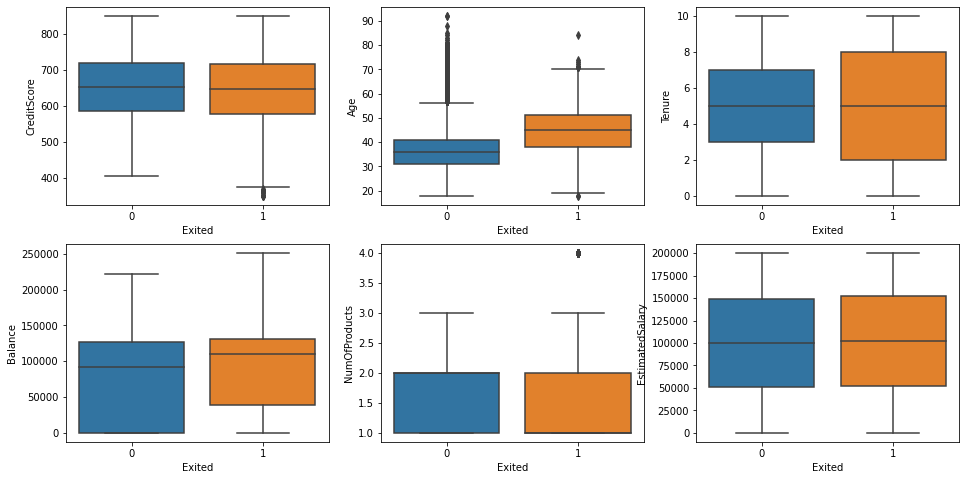

In [11]:
fig, ax = plt.subplots(2,3, figsize=[16,8])
num_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
j,k = 0,0
for i in num_features:
  sns.boxplot(x='Exited', y=i, data = df, ax=ax[int(np.floor(j))][np.mod(k,3)])
  j+=1/3
  k+=1


In [12]:
corr = df_num.corr()
corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001384
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007201
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007784
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012797
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014204
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,1.000000


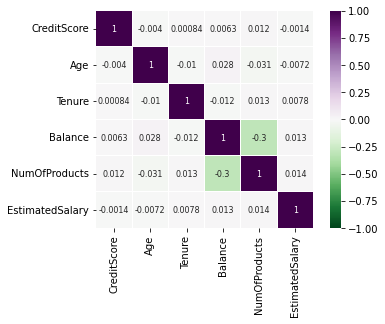

In [13]:
sns.heatmap(corr, cmap='PRGn_r', vmax=1,vmin=-1, square=True,linewidths=0.1,
            annot=True, annot_kws={"size": 8});

## Part 1.3: Categorical features

In [14]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [15]:
df_cat = df[['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']]

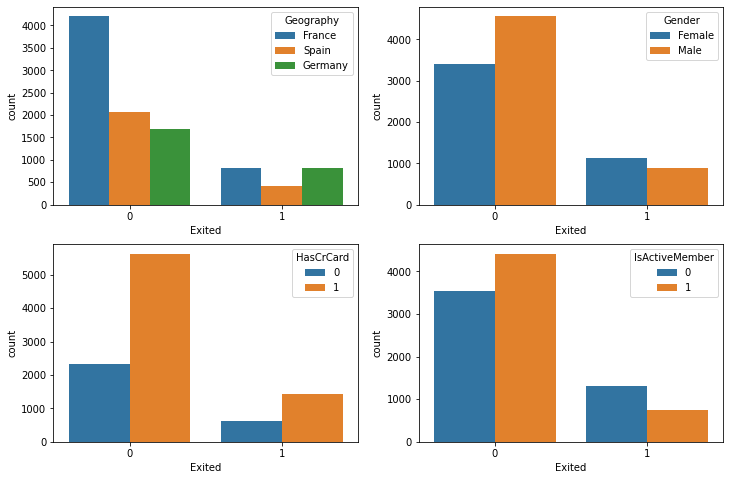

In [16]:
fig1, ax1 = plt.subplots(2,2, figsize=[12,8])
cat_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
j,k = 0,0
for i in df_cat:
  sns.countplot(x='Exited', hue=i, data = df, ax=ax1[int(np.floor(j))][np.mod(k,2)])
  j+=1/2
  k+=1

# Part 2: Feature Preprocessing

In [17]:
X = pd.concat([df_num, df_cat], axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography,Gender,HasCrCard,IsActiveMember
0,619,42,2,0.00,1,101348.88,France,Female,1,1
1,608,41,1,83807.86,1,112542.58,Spain,Female,0,1
2,502,42,8,159660.80,3,113931.57,France,Female,1,0
3,699,39,1,0.00,2,93826.63,France,Female,0,0
4,850,43,2,125510.82,1,79084.10,Spain,Female,1,1


In [18]:
# Split Data into Training & Testing：

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=123)
X_train.shape, X_test.shape

((8000, 10), (2000, 10))

## Part 2.1.1 Feature Scaling

In [19]:
scaler = StandardScaler()
scaler.fit(X_train[num_features])

X_train[num_features] = scaler.transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

In [20]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography,Gender,HasCrCard,IsActiveMember
9385,0.382227,0.487923,1.033751,0.308125,0.825039,-1.712869,Germany,Male,1,1
2155,0.101876,-0.379067,0.341382,0.394675,-0.914174,-1.409809,France,Female,1,0
768,0.351077,0.198926,-1.043358,0.699392,0.825039,0.349622,Spain,Male,0,0
6082,0.776796,0.102594,1.033751,0.448857,-0.914174,-0.664364,Germany,Male,1,0
2926,-1.455629,2.318235,1.033751,-1.220239,0.825039,0.262719,France,Male,1,1


## Part 2.1.2 Encoding：

Binary features `HasCrCard`, `IsActiveMember` already in a form of 0-1 value so we can leave them as they are.
But we would need transform `Gender` and `Geography` features. 

In [21]:
# Gender:

X_train['Gender'] = X_train['Gender'].replace({'Female': 0, 'Male': 1})
X_test['Gender'] = X_test['Gender'].replace({'Female': 0, 'Male': 1})

In [22]:
X_train = pd.get_dummies(X_train,columns=['Geography'])
X_test = pd.get_dummies(X_test,columns=['Geography'])
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Gender,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain
9385,0.382227,0.487923,1.033751,0.308125,0.825039,-1.712869,1,1,1,0,1,0
2155,0.101876,-0.379067,0.341382,0.394675,-0.914174,-1.409809,0,1,0,1,0,0
768,0.351077,0.198926,-1.043358,0.699392,0.825039,0.349622,1,0,0,0,0,1
6082,0.776796,0.102594,1.033751,0.448857,-0.914174,-0.664364,1,1,0,0,1,0
2926,-1.455629,2.318235,1.033751,-1.220239,0.825039,0.262719,1,1,1,1,0,0


In [23]:
#from collections import Counter
#from scipy.sparse.construct import random
#from imblearn.over_sampling import SMOTE

#X_smote, y_smote = SMOTE(random_state=123).fit_resample(X_train, y_train)
#Counter(y_smote).items()

# Part 3: Model Training

In [24]:
#X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

In [25]:
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

## Part 3.1: Logistic Regression

In [26]:
# Logistic Regression

logistic = LogisticRegression(solver='liblinear', random_state=123)
#logistic_test_score = logistic.fit(X_train, y_train).score(X_test, y_test)
logistic_cvscore = cross_val_score(logistic, X_train, y_train, cv=5)
print('Model accuracy of baseline logistic regression is:',logistic_cvscore.mean())
#print('test set accuracy of baseline logistic regression is:',logistic_test_score)

Model accuracy of baseline logistic regression is: 0.810125


In [27]:
param_logistic = {'penalty':['l1','l2'], 'C' :[0.01, 0.075, 0.08, 0.09, 1, 0.2, 0.5, 0.7, 0.8]}
lr_grid = GridSearchCV(estimator = logistic, param_grid=param_logistic, scoring='accuracy', cv = 5, n_jobs=-1)
lr = lr_grid.fit(X_train, y_train)

In [28]:
print_grid_search_metrics(lr)

Best score: 0.8105
Best parameters set:
C:0.08
penalty:l1


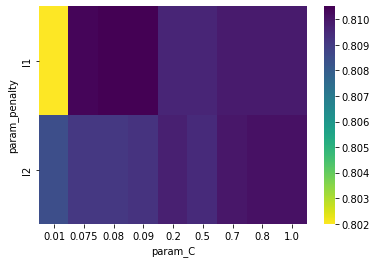

In [29]:
res = pd.DataFrame(lr_grid.cv_results_).pivot(index='param_penalty', columns='param_C', values='mean_test_score')
sns.heatmap(res, cmap='viridis_r')

In [30]:
res

param_C,0.010,0.075,0.080,0.090,0.200,0.500,0.700,0.800,1.000
param_penalty,,,,,,,,,
l1,0.8020,0.810375,0.810500,0.81050,0.809625,0.809625,0.809875,0.809875,0.809875
l2,0.8085,0.809125,0.809125,0.80925,0.809750,0.809500,0.810000,0.810125,0.810125


In [31]:
lr_best = lr.best_estimator_
#lr_best.score(X_test,y_test)

## Part 3.2: K-Nearest Neighborhood

In [32]:
KNN = KNeighborsClassifier(n_jobs= -1)
#KNN_test_score = KNN.fit(X_train, y_train).score(X_test, y_test)
KNN_cvscore = cross_val_score(KNN, X_train, y_train, cv = 5)
print('Model accuracy of baseline KNN model is:',KNN_cvscore.mean())
#print('test set accuracy of baseline logistic regression is:',KNN_test_score)

Model accuracy of baseline KNN model is: 0.83575


In [33]:
param_KNN = {'n_neighbors':[13,15,17,19,21,23,25,27]}
KNN_grid = GridSearchCV(estimator = KNN, param_grid=param_KNN, scoring='accuracy', cv = 5, n_jobs=-1)
knn_model = KNN_grid.fit(X_train, y_train)
print_grid_search_metrics(knn_model)

Best score: 0.8483750000000001
Best parameters set:
n_neighbors:21


In [34]:
from sklearn.neighbors import KNeighborsClassifier
res = pd.DataFrame(KNN_grid.cv_results_['mean_test_score'],index= KNN_grid.cv_results_['params'], columns = ['mean_test_score'])
res

,mean_test_score
{'n_neighbors': 13},0.845375
{'n_neighbors': 15},0.845875
{'n_neighbors': 17},0.846000
{'n_neighbors': 19},0.847000
{'n_neighbors': 21},0.848375
{'n_neighbors': 23},0.847250
{'n_neighbors': 25},0.847750
{'n_neighbors': 27},0.846625


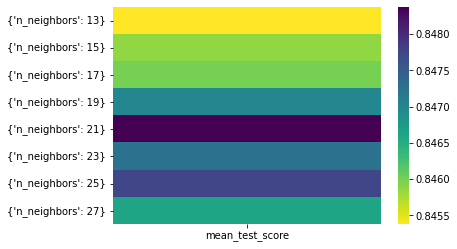

In [35]:
sns.heatmap(res, cmap = 'viridis_r')

In [36]:
knn_best = knn_model.best_estimator_
#knn_best.score(X_test,y_test)

## Part 3.3: Random Forest

In [37]:
random_forest = RandomForestClassifier(n_jobs=-1,random_state=123)
#random_forest_test_score = random_forest.fit(X_train, y_train).score(X_test, y_test)
random_forest_cvscore = cross_val_score(random_forest, X_train, y_train, cv = 5)
print('Model accuracy of baseline random forest model is:',random_forest_cvscore.mean())
#print('test set accuracy of baseline random forest is:',random_forest_test_score)

Model accuracy of baseline random forest model is: 0.8612500000000001


In [38]:
param_rf = {'n_estimators':[60,80,100,120],'max_depth':[6,8,10,12]}
rf_grid = GridSearchCV(estimator = random_forest, param_grid=param_rf, scoring='accuracy', cv = 5, n_jobs=-1)
rf = rf_grid.fit(X_train, y_train)
print_grid_search_metrics(rf)

Best score: 0.8634999999999999
Best parameters set:
max_depth:10
n_estimators:80


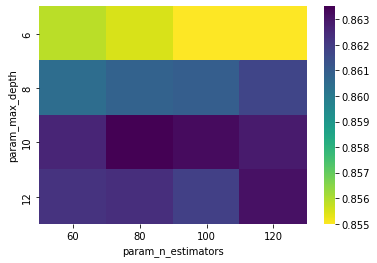

In [39]:
res = pd.DataFrame(rf_grid.cv_results_).pivot(index='param_max_depth', columns='param_n_estimators', values='mean_test_score')
sns.heatmap(res, cmap='viridis_r')

In [40]:
res

param_n_estimators,60,80,100,120
param_max_depth,,,,
6,0.855875,0.855500,0.855000,0.855000
8,0.860500,0.860875,0.861000,0.861750
10,0.862625,0.863500,0.863250,0.862875
12,0.862250,0.862375,0.861875,0.863125


In [41]:
rf_best = rf.best_estimator_
#rf_best.score(X_test, y_test)

## Part 3.4: Ada-Boost

In [42]:
#svm = SVC(probability=True)
#svm_test_score = svm.fit(X_train, y_train).score(X_test, y_test)
#svm_cvscore = cross_val_score(svm,X_train, y_train, cv = 5)
#print('Model accuracy of baseline svm is:',svm_cvscore.mean())
#print('test set accuracy of baseline svm is:',svm_test_score)

In [43]:
#param_svm = {'C': [0.1,0.01], 'gamma': [1,10],'kernel': ['rbf', 'poly', 'sigmoid']}
#svm_grid = GridSearchCV(estimator = svm, param_grid=param_svm, scoring='accuracy', cv = 5, n_jobs=-1)
#svm_model = svm_grid.fit(X_train, y_train)
#print_grid_search_metrics(svm_model)

In [44]:
ada= AdaBoostClassifier(random_state=123)
ada_cvscore = cross_val_score(ada, X_train, y_train, cv = 5)
print('Model accuracy for baseline Adaboost is: ', ada_cvscore.mean())

Model accuracy for baseline Adaboost is:  0.8536249999999999


In [45]:
param_ada = {'n_estimators':[70, 30, 40, 60]}
ada_grid = GridSearchCV(estimator = ada, param_grid = param_ada, scoring = 'accuracy', cv = 5, n_jobs = -1)
ada_model = ada_grid.fit(X_train, y_train)
print_grid_search_metrics(ada_model)

Best score: 0.8542500000000001
Best parameters set:
n_estimators:60


In [46]:
ada_best = ada_model.best_estimator_
#ada_best.score(X_test, y_test)

# Part 4: Model Evaluation

## Part 4.1: Logistic Model

In [47]:
print(classification_report(y_test, lr_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1593
           1       0.60      0.23      0.33       407

    accuracy                           0.81      2000
   macro avg       0.71      0.59      0.61      2000
weighted avg       0.78      0.81      0.78      2000



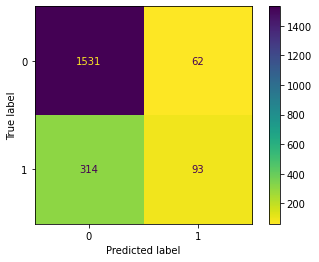

In [48]:
ConfusionMatrixDisplay.from_predictions(y_test,lr_best.predict(X_test),cmap='viridis_r');

## Part 4.2: K-Nearest Neighborhood Model

In [54]:
print(classification_report(y_test, knn_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1593
           1       0.73      0.39      0.51       407

    accuracy                           0.85      2000
   macro avg       0.79      0.68      0.71      2000
weighted avg       0.83      0.85      0.83      2000



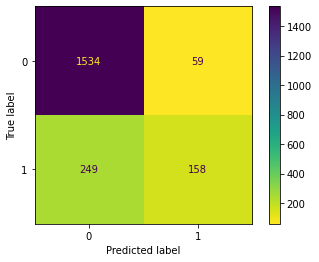

In [56]:
ConfusionMatrixDisplay.from_predictions(y_test, 
                                        knn_best.predict(X_test), 
                                        cmap='viridis_r');

## Part 4.3: Random Forest

In [58]:
print(classification_report(y_test, rf_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.81      0.48      0.61       407

    accuracy                           0.87      2000
   macro avg       0.85      0.73      0.76      2000
weighted avg       0.87      0.87      0.86      2000



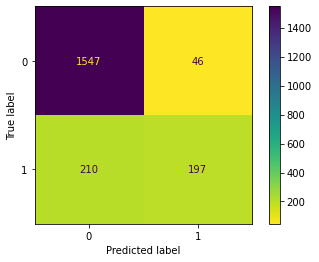

In [61]:
ConfusionMatrixDisplay.from_predictions(y_test, rf_best.predict(X_test), cmap='viridis_r');

## Part 4.4: Ada-Boost

In [63]:
print(classification_report(y_test, ada_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1593
           1       0.72      0.52      0.60       407

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



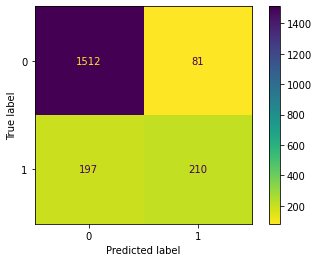

In [66]:
ConfusionMatrixDisplay.from_predictions(y_test, ada_best.predict(X_test), cmap='viridis_r');

## Part 4.5: ROC & AUC

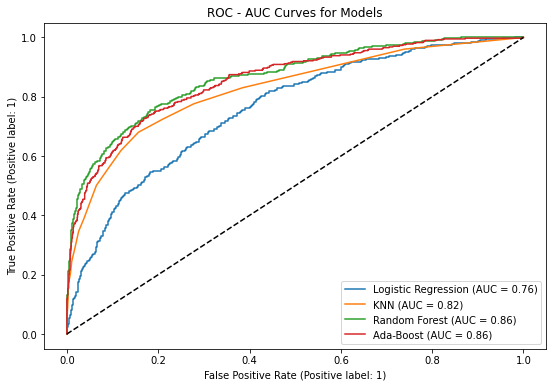

In [53]:
fig,ax = plt.subplots(1,1,figsize=(9,6))
RocCurveDisplay.from_predictions(y_test, 
                                 lr_best.predict_proba(X_test)[:,-1], 
                                 name='Logistic Regression',ax=ax)
RocCurveDisplay.from_predictions(y_test, 
                                 knn_best.predict_proba(X_test)[:,-1], 
                                 name='KNN', ax=ax)
RocCurveDisplay.from_predictions(y_test, 
                                 rf_best.predict_proba(X_test)[:,-1], 
                                 name='Random Forest', ax=ax)
RocCurveDisplay.from_predictions(y_test, 
                                 ada_best.predict_proba(X_test)[:,-1], 
                                 name='Ada-Boost', ax=ax)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_title('ROC - AUC Curves for Models');

## Part 4.6: Feature Importance

In [81]:
importance = rf_best.feature_importances_
index = np.argsort(importance)[::-1]
print('Random Forest Feature Importance Ranking: \n')
for i in range(len(index)):
  print('{col}:{num}'.format(col= X_train.columns[index[i]], 
                             num = round(importance[index[i]],3)))

Random Forest Feature Importance Ranking: 

Age:0.309
NumOfProducts:0.218
Balance:0.115
CreditScore:0.083
EstimatedSalary:0.08
IsActiveMember:0.06
Tenure:0.045
Geography_Germany:0.041
Gender:0.02
HasCrCard:0.011
Geography_France:0.01
Geography_Spain:0.009
